# Data Pre-processing
The dataset is from kaggle: Walmart Sales https://www.kaggle.com/datasets/mikhail1681/walmart-sales/data.

This project aims to explore what factors influence Walmart's revenue and leverage machine learning modeling to predict the reduction in cost and the increase in economic impact.

The data contains the following columns:


*   Store: Store number
* Date: Sales week start date
* Weekly_Sales: Sales
* Holiday_Flag: Mark on the presence or absence of a holiday
* Temperature: Air temperature in the region
* Fuel_Price: Fuel cost in the region
* CPI: Consumer price index
* Unemployment: Unemployment rate



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Walmart_Sales.csv')

df.shape

(6435, 8)

In [2]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
df.dtypes

,0
Store,int64
Date,object
Weekly_Sales,float64
Holiday_Flag,int64
Temperature,float64
Fuel_Price,float64
CPI,float64
Unemployment,float64


In [4]:
# the data type of data is not a proper datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [5]:
# recheck data type
df.dtypes

,0
Store,int64
Date,datetime64[ns]
Weekly_Sales,float64
Holiday_Flag,int64
Temperature,float64
Fuel_Price,float64
CPI,float64
Unemployment,float64


In [6]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,5
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,12
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19


# Exploratory Data Analysis (EDA)

<ipython-input-7-1fc7ce884cfb>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year-Month', y='Weekly_Sales', data=monthly_sales, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

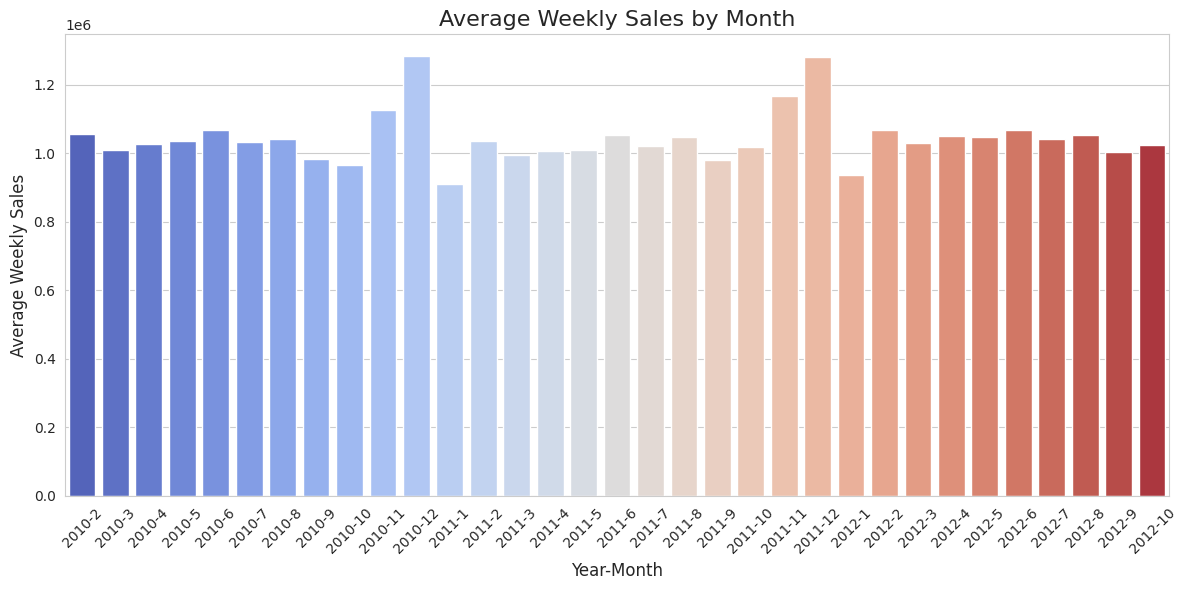

In [7]:
# Group the data by Year and Month, then calculate the average weekly sales
monthly_sales = df.groupby(['Year', 'Month'])['Weekly_Sales'].mean().reset_index()

# Create a new column 'Year-Month' to use as a label for the x-axis
monthly_sales['Year-Month'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str)

# Set the plot size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create a bar plot for average monthly sales
sns.barplot(x='Year-Month', y='Weekly_Sales', data=monthly_sales, palette='coolwarm')

# Add title and labels
plt.title('Average Weekly Sales by Month', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Average Weekly Sales', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to ensure everything fits
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-8-e222c6c3c016>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Store', y='Weekly_Sales', data=store_sales, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping

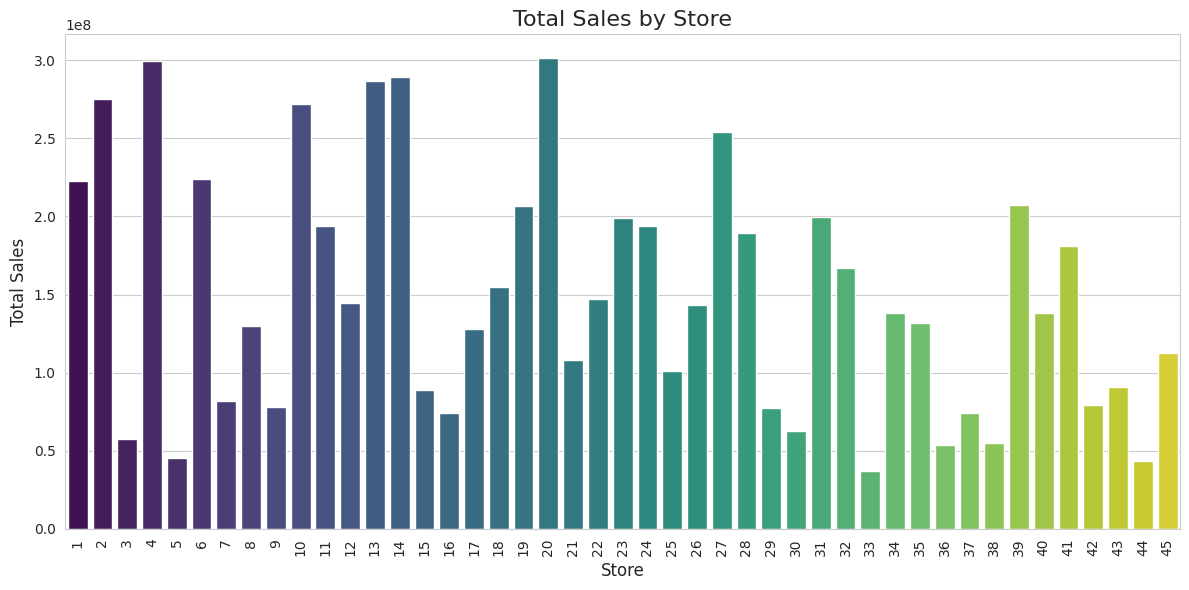

In [8]:
# Group the data by 'Store' and calculate the total sales for each store
store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Sort by sales to find the top stores
store_sales = store_sales.sort_values(by='Weekly_Sales', ascending=False)

# Set the plot size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create a bar plot to show total sales for each store
sns.barplot(x='Store', y='Weekly_Sales', data=store_sales, palette='viridis')

# Add title and labels
plt.title('Total Sales by Store', fontsize=16)
plt.xlabel('Store', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

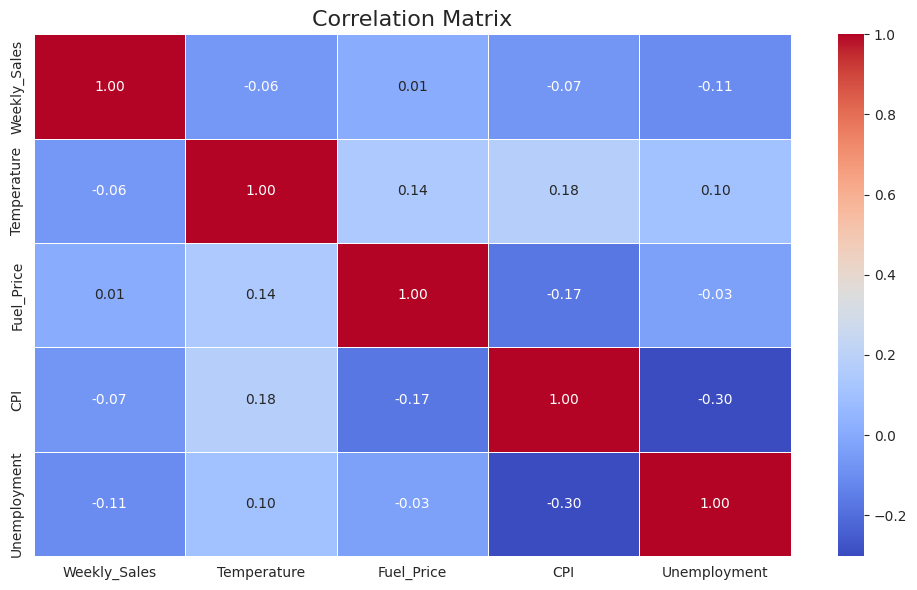

In [9]:
# Calculate the correlation matrix
correlation_matrix = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()

# Set the plot size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Add title
plt.title('Correlation Matrix', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


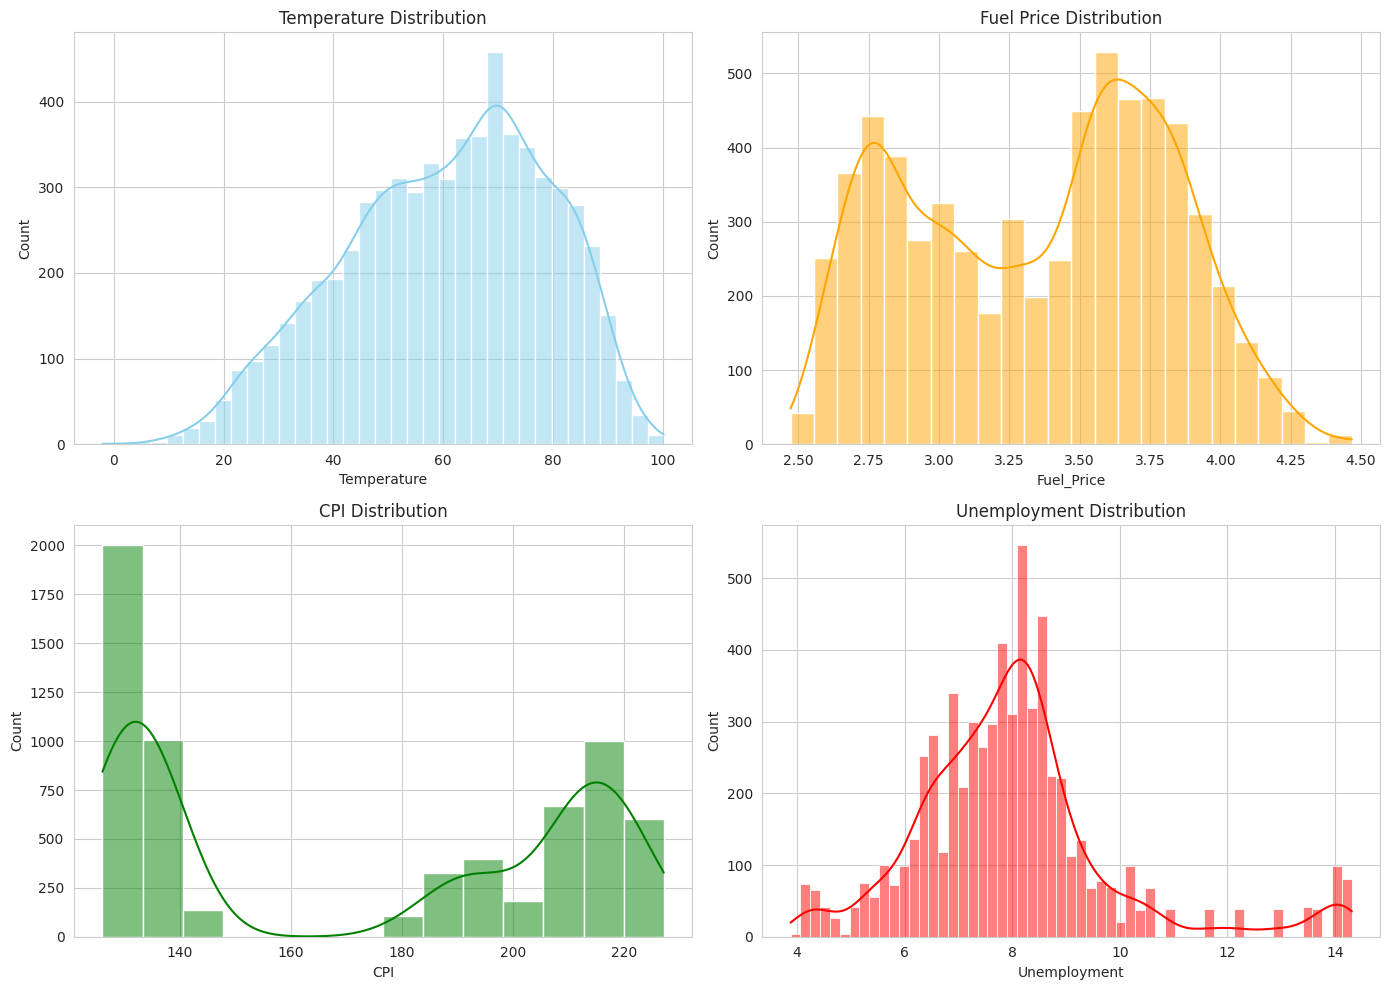

In [10]:
# Set the plot size and style
plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")

# Create a 2x2 grid of histograms for the key features
plt.subplot(2, 2, 1)
sns.histplot(df['Temperature'], kde=True, color='skyblue')
plt.title('Temperature Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['Fuel_Price'], kde=True, color='orange')
plt.title('Fuel Price Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['CPI'], kde=True, color='green')
plt.title('CPI Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['Unemployment'], kde=True, color='red')
plt.title('Unemployment Distribution')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# Clustering

In [11]:
# Select relevant features for clustering
clustering_features = df[['Store', 'Weekly_Sales', 'CPI', 'Fuel_Price', 'Unemployment']]

# Group by store to aggregate the data (e.g., taking the mean of weekly sales per store)
store_grouped_data = clustering_features.groupby('Store').mean().reset_index()

# Drop the 'Store' column as it's a categorical feature and won't be used in clustering
store_grouped_data = store_grouped_data.drop('Store', axis=1)

# Display the data to be clustered
store_grouped_data.head()


,Weekly_Sales,CPI,Fuel_Price,Unemployment
0,1.555264e+06,215.996892,3.219699,7.610420
1,1.925751e+06,215.646311,3.219699,7.623846
2,4.027044e+05,219.391531,3.219699,7.176986
3,2.094713e+06,128.679669,3.216972,5.964692
4,3.180118e+05,216.565581,3.219699,6.295406


In [12]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the data
scaled_data = scaler.fit_transform(store_grouped_data)

# Convert the scaled data back into a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=store_grouped_data.columns)

# Display the scaled data
scaled_df.head()


,Weekly_Sales,CPI,Fuel_Price,Unemployment
0,0.940392,1.132638,-0.940090,-0.219871
1,1.625821,1.123699,-0.940090,-0.212277
2,-1.191930,1.219199,-0.940090,-0.465026
3,1.938413,-1.093885,-0.958548,-1.150714
4,-1.348618,1.147139,-0.940090,-0.963659


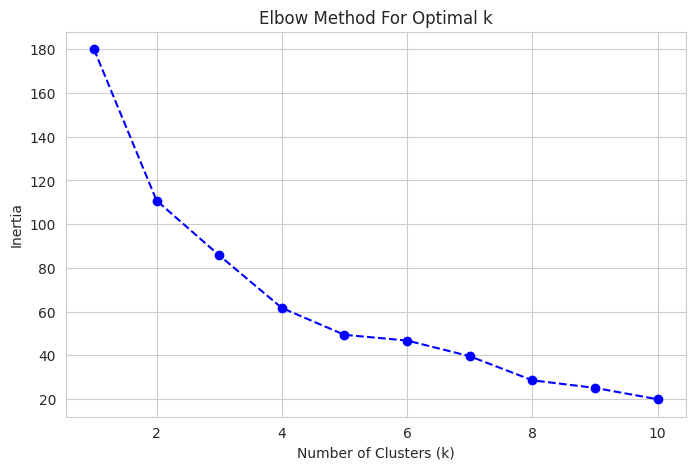

In [13]:
from sklearn.cluster import KMeans

# Initialize an empty list to store inertia values (sum of squared distances to centroids)
inertia = []

# Loop over different numbers of clusters (k values)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the inertia values to see the "elbow"
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--', color='b')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [14]:
# Fit the K-Means model with the chosen number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_df)

# Add the cluster labels to the original DataFrame
store_grouped_data['Cluster'] = kmeans.labels_

# Display the first few rows with cluster assignments
store_grouped_data.head()


,Weekly_Sales,CPI,Fuel_Price,Unemployment,Cluster
0,1.555264e+06,215.996892,3.219699,7.610420,2
1,1.925751e+06,215.646311,3.219699,7.623846,2
2,4.027044e+05,219.391531,3.219699,7.176986,2
3,2.094713e+06,128.679669,3.216972,5.964692,0
4,3.180118e+05,216.565581,3.219699,6.295406,2


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

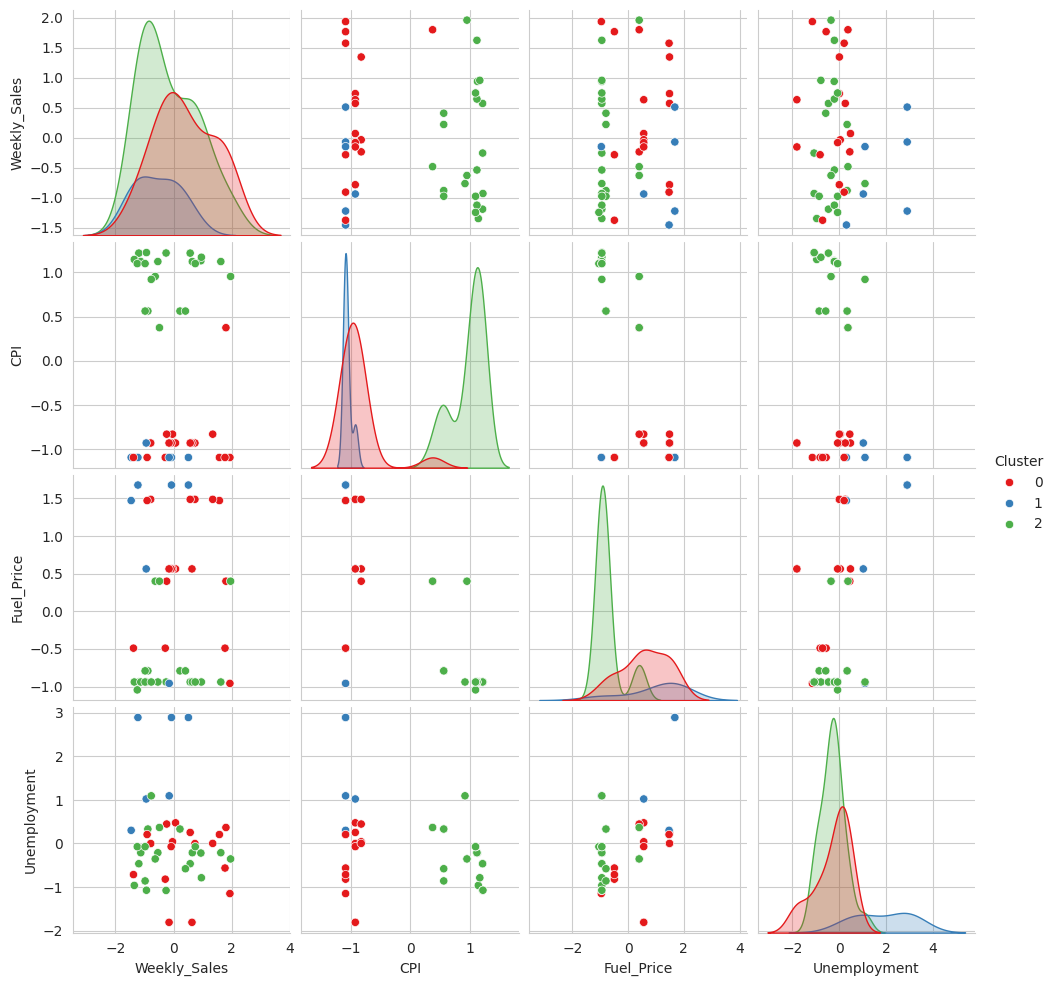

<ipython-input-15-c0fc7ec42e00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Weekly_Sales', data=store_grouped_data, palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tu

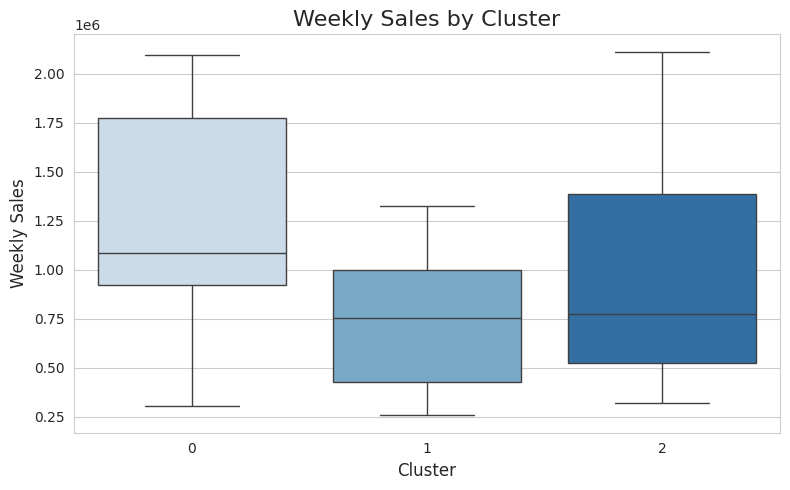

In [15]:
# Add cluster labels back to the scaled DataFrame for visualization
scaled_df['Cluster'] = kmeans.labels_

# Plot pair plot for selected features to visualize clusters
sns.pairplot(scaled_df, hue='Cluster', palette='Set1')

# Show the plot
plt.show()

# Alternatively, plot specific feature against clusters (e.g., Weekly Sales vs. Cluster)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cluster', y='Weekly_Sales', data=store_grouped_data, palette='Blues')

# Add title and labels
plt.title('Weekly Sales by Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


# Predictive Modeling

In [16]:
from sklearn.model_selection import train_test_split

# Features (remove 'Weekly_Sales' as it is the target)
X = df[['Fuel_Price', 'CPI', 'Unemployment', 'Holiday_Flag']]

# Target variable (Weekly Sales)
y = df['Weekly_Sales']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f"Training Set Shape: {X_train.shape}")
print(f"Testing Set Shape: {X_test.shape}")


Training Set Shape: (5148, 4)
Testing Set Shape: (1287, 4)


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model using the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Square Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 475382.0066722849
Root Mean Square Error (RMSE): 562997.9616264943


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [18]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

print(f"Random Forest Mean Absolute Error (MAE): {mae_rf}")
print(f"Random Forest Root Mean Square Error (RMSE): {rmse_rf}")


Random Forest Mean Absolute Error (MAE): 417921.70773017674
Random Forest Root Mean Square Error (RMSE): 575238.2072021315


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


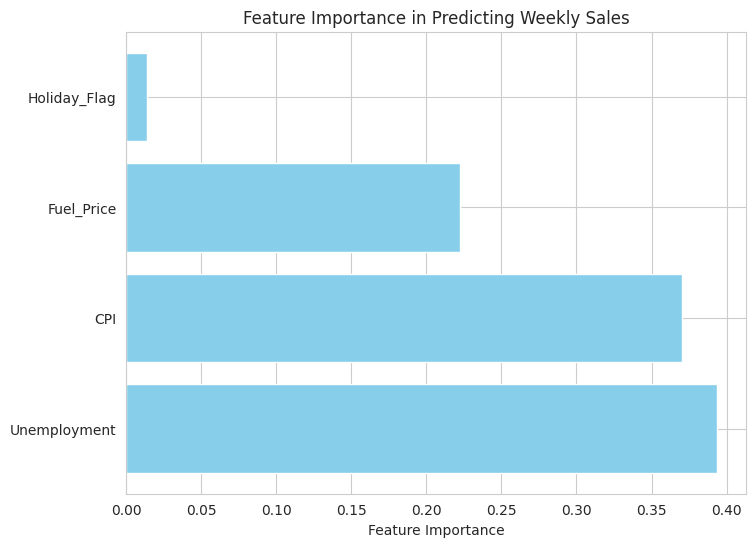

In [19]:
# Get the feature importance from the Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(8, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Predicting Weekly Sales')
plt.show()


In [20]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Initialize the Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Train the best model
best_rf_model = grid_search.best_estimator_

# Make predictions and evaluate the best model
y_pred_best_rf = best_rf_model.predict(X_test)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
rmse_best_rf = mean_squared_error(y_test, y_pred_best_rf, squared=False)

print(f"Best Random Forest Mean Absolute Error (MAE): {mae_best_rf}")
print(f"Best Random Forest Root Mean Square Error (RMSE): {rmse_best_rf}")


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Random Forest Mean Absolute Error (MAE): 369482.1494750956
Best Random Forest Root Mean Square Error (RMSE): 478740.5370095987


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
